In [135]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt



In [136]:
import seaborn as sns

In [137]:
plt.style.use('ggplot')

In [138]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)


In [139]:
df= pd.read_csv('./coaster_db.csv')
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [140]:
df.shape

(1087, 56)

In [141]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [142]:
df.dtypes


coaster_name         object
Length               object
Speed                object
Location             object
Status               object
                     ...   
height_value        float64
height_unit          object
height_ft           float64
Inversions_clean      int64
Gforce_clean        float64
Length: 56, dtype: object

In [143]:
x = df.columns.to_series().groupby(df.dtypes).groups
x


{int64: ['year_introduced', 'Inversions_clean'], float64: ['Inversions', 'latitude', 'longitude', 'speed1_value', 'speed_mph', 'height_value', 'height_ft', 'Gforce_clean'], object: ['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date', 'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height', 'Lift/launch system', 'Cost', 'Trains', 'Park section', 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle', 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout', 'Fastrack available', 'Soft opening date.1', 'Closing date', 'Opened', 'Replaced by', 'Website', 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme', 'Single rider line available', 'Restraint Style', 'Flash Pass available', 'Acceleration', 'Restraints', 'Name', 'Type_Main', 'opening_date_clean', 'speed1', 'speed2', 'speed1_unit', 'height_unit']}

In [144]:
col_types = {'int64': ['year_introduced', 'Inversions_clean'], 'float64': ['Inversions', 'latitude', 'longitude', 'speed1_value', 'speed_mph', 'height_value', 'height_ft', 'Gforce_clean'], 'object': ['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date', 'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height', 'Lift/launch system', 'Cost', 'Trains', 'Park section', 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle', 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout', 'Fastrack available', 'Soft opening date.1', 'Closing date', 'Opened', 'Replaced by', 'Website', 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme', 'Single rider line available', 'Restraint Style', 'Flash Pass available', 'Acceleration', 'Restraints', 'Name', 'Type_Main', 'opening_date_clean', 'speed1', 'speed2', 'speed1_unit', 'height_unit']}
col_types

{'int64': ['year_introduced', 'Inversions_clean'],
 'float64': ['Inversions',
  'latitude',
  'longitude',
  'speed1_value',
  'speed_mph',
  'height_value',
  'height_ft',
  'Gforce_clean'],
 'object': ['coaster_name',
  'Length',
  'Speed',
  'Location',
  'Status',
  'Opening date',
  'Type',
  'Manufacturer',
  'Height restriction',
  'Model',
  'Height',
  'Lift/launch system',
  'Cost',
  'Trains',
  'Park section',
  'Duration',
  'Capacity',
  'G-force',
  'Designer',
  'Max vertical angle',
  'Drop',
  'Soft opening date',
  'Fast Lane available',
  'Replaced',
  'Track layout',
  'Fastrack available',
  'Soft opening date.1',
  'Closing date',
  'Opened',
  'Replaced by',
  'Website',
  'Flash Pass Available',
  'Must transfer from wheelchair',
  'Theme',
  'Single rider line available',
  'Restraint Style',
  'Flash Pass available',
  'Acceleration',
  'Restraints',
  'Name',
  'Type_Main',
  'opening_date_clean',
  'speed1',
  'speed2',
  'speed1_unit',
  'height_unit']}

In [145]:
col_types['int64']

['year_introduced', 'Inversions_clean']

In [146]:
col_types['float64']

['Inversions',
 'latitude',
 'longitude',
 'speed1_value',
 'speed_mph',
 'height_value',
 'height_ft',
 'Gforce_clean']

In [147]:
col_types['object']

['coaster_name',
 'Length',
 'Speed',
 'Location',
 'Status',
 'Opening date',
 'Type',
 'Manufacturer',
 'Height restriction',
 'Model',
 'Height',
 'Lift/launch system',
 'Cost',
 'Trains',
 'Park section',
 'Duration',
 'Capacity',
 'G-force',
 'Designer',
 'Max vertical angle',
 'Drop',
 'Soft opening date',
 'Fast Lane available',
 'Replaced',
 'Track layout',
 'Fastrack available',
 'Soft opening date.1',
 'Closing date',
 'Opened',
 'Replaced by',
 'Website',
 'Flash Pass Available',
 'Must transfer from wheelchair',
 'Theme',
 'Single rider line available',
 'Restraint Style',
 'Flash Pass available',
 'Acceleration',
 'Restraints',
 'Name',
 'Type_Main',
 'opening_date_clean',
 'speed1',
 'speed2',
 'speed1_unit',
 'height_unit']

In [148]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [149]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [150]:
df= df[['coaster_name', 
    'Length', 
    'Speed', 
    'Location', 
    #'Status', 'Opening date',
     #  'Type', 
     'Manufacturer', 
     #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
     #  'Duration', 'Capacity', 
     'G-force', 
     #'Designer', 
     'Max vertical angle',
     'Drop', 
     #'Soft opening date', 'Fast Lane available', 'Replaced',
     #  'Track layout', 'Fastrack available', 'Soft opening date.1',
     #  'Closing date', 'Opened', 'Replaced by', 'Website',
     #  'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
     #  'Single rider line available', 'Restraint Style',
    # 'Flash Pass available', 
    'Acceleration', 
    #'Restraints', 'Name',
       'year_introduced', 
    #'latitude', 'longitude', 'Type_Main',
      'opening_date_clean', 
     # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 
       'Gforce_clean']].copy()

In [151]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Manufacturer',
       'G-force', 'Max vertical angle', 'Drop', 'Acceleration',
       'year_introduced', 'opening_date_clean', 'speed_mph', 'height_value',
       'height_unit', 'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [152]:
df.dtypes

coaster_name           object
Length                 object
Speed                  object
Location               object
Manufacturer           object
G-force                object
Max vertical angle     object
Drop                   object
Acceleration           object
year_introduced         int64
opening_date_clean     object
speed_mph             float64
height_value          float64
height_unit            object
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [153]:
df['opening_date_clean']

0       1884-06-16
1       1895-01-01
2              NaN
3       1901-01-01
4       1901-01-01
           ...    
1082           NaN
1083    2022-01-01
1084    2016-06-16
1085           NaN
1086    2022-01-01
Name: opening_date_clean, Length: 1087, dtype: object

In [154]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])

In [155]:
df.dtypes

coaster_name                  object
Length                        object
Speed                         object
Location                      object
Manufacturer                  object
G-force                       object
Max vertical angle            object
Drop                          object
Acceleration                  object
year_introduced                int64
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_value                 float64
height_unit                   object
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [156]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Manufacturer',
       'G-force', 'Max vertical angle', 'Drop', 'Acceleration',
       'year_introduced', 'opening_date_clean', 'speed_mph', 'height_value',
       'height_unit', 'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [157]:
df.rename(columns={'coaster_name':'Coaster_Name',
       'year_introduced':'Year_Introduced', 'opening_date_clean':'Opening_Date', 'speed_mph':'Speed_mph', 'height_value':'Height',
       'height_ft':'Height_ft'}, inplace=True)

In [158]:
df.isna().sum()

Coaster_Name             0
Length                 134
Speed                  150
Location                 0
Manufacturer            59
G-force                725
Max vertical angle     730
Drop                   593
Acceleration          1027
Year_Introduced          0
Opening_Date           250
Speed_mph              150
Height                 122
height_unit            122
Height_ft              916
Inversions_clean         0
Gforce_clean           725
dtype: int64

In [159]:
df.drop('Acceleration', axis=1, inplace=True)

In [160]:
df.columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Manufacturer',
       'G-force', 'Max vertical angle', 'Drop', 'Year_Introduced',
       'Opening_Date', 'Speed_mph', 'Height', 'height_unit', 'Height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [161]:
df.duplicated(subset=['Coaster_Name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [162]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Traver Engineering,4 Gs,59°,90 ft (27 m),1927,1926-01-01,60.0,96.0,ft,NaN,0,4.0
60,Derby Racer,NaN,NaN,Revere Beach,Fred W. Pearce,NaN,NaN,NaN,1937,1911-01-01,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,NaN,NaN,NaN,NaN,1938,1938-05-23,50.0,77.0,ft,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,Arrow Development (California and Florida)Dyna...,NaN,NaN,NaN,1980,NaT,35.0,104.0,ft,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Mack Rides,NaN,NaN,NaN,1986,1981-05-23,39.8,10.0,m,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,262.5 ft (80.0 m),NaN,Six Flags Great Adventure,Zamperla,NaN,NaN,NaN,2021,1999-01-01,NaN,13.0,ft,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Allan Herschell Company,NaN,NaN,NaN,2021,1950-01-01,NaN,NaN,NaN,NaN,0,NaN
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Rocky Mountain Construction,NaN,91°,206 ft (63 m),2022,NaT,76.0,206.0,ft,NaN,2,NaN
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,Anton Schwarzkopf,4.7,NaN,NaN,2022,NaT,53.0,111.0,ft,NaN,3,4.7


In [163]:
f= (df['Coaster_Name'] == 'Tron Lightcycle Power Run')
df.loc[f]

,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
978,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,Vekoma,4,NaN,NaN,2016,2016-06-16,59.3,78.1,ft,NaN,0,4.0
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,Vekoma,4,NaN,NaN,2022,2016-06-16,59.3,78.1,ft,NaN,0,4.0


In [164]:
df.query('Coaster_Name == "Tron Lightcycle Power Run"')

,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
978,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,Vekoma,4,NaN,NaN,2016,2016-06-16,59.3,78.1,ft,NaN,0,4.0
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,Vekoma,4,NaN,NaN,2022,2016-06-16,59.3,78.1,ft,NaN,0,4.0


In [165]:
df.duplicated(subset=['Coaster_Name','Location', 'Opening_Date']).sum()

97

In [166]:
df.loc[df.duplicated(subset=['Coaster_Name','Location', 'Opening_Date'])]

,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Traver Engineering,4 Gs,59°,90 ft (27 m),1927,1926-01-01,60.0,96.0,ft,NaN,0,4.0
60,Derby Racer,NaN,NaN,Revere Beach,Fred W. Pearce,NaN,NaN,NaN,1937,1911-01-01,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,NaN,NaN,NaN,NaN,1938,1938-05-23,50.0,77.0,ft,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,Arrow Development (California and Florida)Dyna...,NaN,NaN,NaN,1980,NaT,35.0,104.0,ft,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Mack Rides,NaN,NaN,NaN,1986,1981-05-23,39.8,10.0,m,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,262.5 ft (80.0 m),NaN,Six Flags Great Adventure,Zamperla,NaN,NaN,NaN,2021,1999-01-01,NaN,13.0,ft,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Allan Herschell Company,NaN,NaN,NaN,2021,1950-01-01,NaN,NaN,NaN,NaN,0,NaN
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Rocky Mountain Construction,NaN,91°,206 ft (63 m),2022,NaT,76.0,206.0,ft,NaN,2,NaN
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,Anton Schwarzkopf,4.7,NaN,NaN,2022,NaT,53.0,111.0,ft,NaN,3,4.7


In [167]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location', 'Opening_Date'])]\
.reset_index(drop=True).copy()

In [168]:
df

,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,LaMarcus Adna Thompson,2.9,30°,43 ft (13 m),1884,1884-06-16,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Lina Beecher,12,NaN,NaN,1895,1895-01-01,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",NaN,NaN,NaN,NaN,1896,NaT,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Edwin Prescott,NaN,NaN,NaN,1901,1901-01-01,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Edwin Prescott,NaN,NaN,NaN,1901,1901-01-01,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),"1,900 ft (580 m)",52 mph (84 km/h),SeaWorld Orlando,Premier Rides,NaN,100°,NaN,2022,2022-02-01,52.0,93.0,ft,NaN,0,NaN
986,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",80.0 km/h (49.7 mph),Sea World,Martin & Vleminckx,NaN,NaN,NaN,2022,2022-01-01,49.7,32.0,m,105.0,0,NaN
987,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Intamin,NaN,95°,NaN,2022,2022-01-01,73.0,178.0,ft,NaN,2,NaN
988,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,S&S – Sansei Technologies,NaN,NaN,NaN,2022,NaT,34.0,112.0,ft,NaN,0,NaN


In [169]:
df['height_unit'].value_counts()

ft    721
m     159
Name: height_unit, dtype: int64

In [170]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

In [171]:
df['Year_Introduced'].isna().value_counts()

False    990
Name: Year_Introduced, dtype: int64

Text(0, 0.5, 'Count')

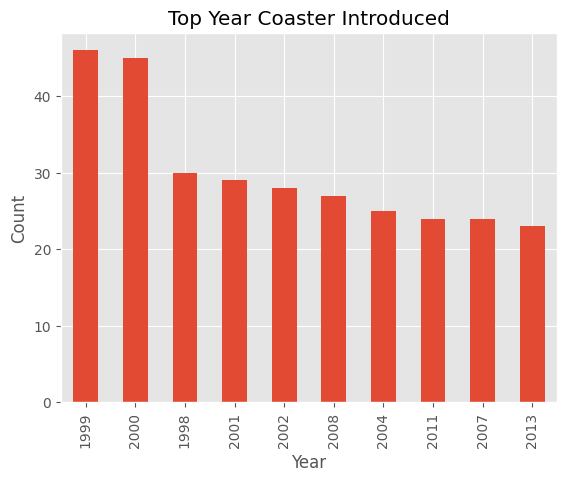

In [172]:
ax =df['Year_Introduced'].value_counts()\
.head(10)\
.plot(kind='bar', title='Top Year Coaster Introduced')

ax.set_xlabel('Year')
ax.set_ylabel('Count')


In [174]:
df['Speed_mph']

0       6.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
985    52.0
986    49.7
987    73.0
988    34.0
989    58.0
Name: Speed_mph, Length: 990, dtype: float64

<Axes: ylabel='Frequency'>

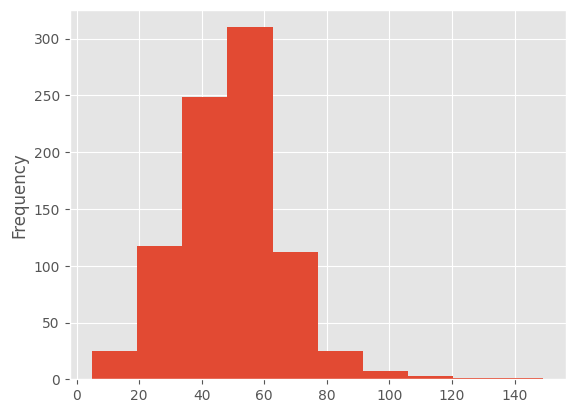

In [176]:
df['Speed_mph'].plot(kind='hist')

Text(0.5, 0, 'mph')

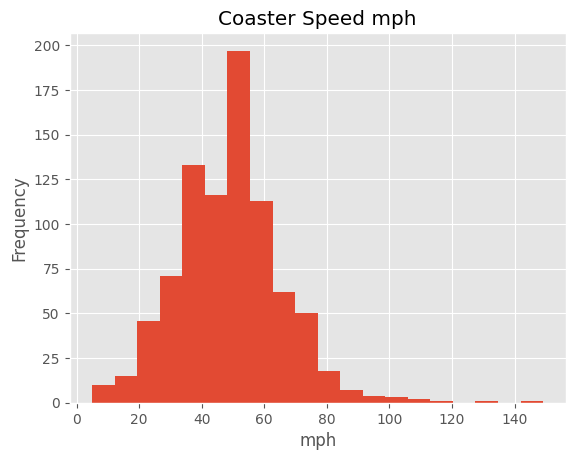

In [186]:
ax = df['Speed_mph'].plot(kind='hist', bins=20)
ax.set_title('Coaster Speed mph')
ax.set_xlabel('mph')


In [188]:
df['Speed']

0          6 mph (9.7 km/h)
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
985        52 mph (84 km/h)
986    80.0 km/h (49.7 mph)
987       73 mph (117 km/h)
988        34 mph (55 km/h)
989        58 mph (93 km/h)
Name: Speed, Length: 990, dtype: object

In [195]:
df['Speed_mph'].describe()

count    850.000000
mean      49.017647
std       16.847266
min        5.000000
25%       37.300000
50%       50.000000
75%       58.000000
max      149.100000
Name: Speed_mph, dtype: float64

In [194]:
f = df['Speed_mph'] >= df['Speed_mph'].mean()
df.loc[f]


,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
20,The Wild One (roller coaster),"4,000 ft (1,200 m)",53 mph (85 km/h),Six Flags America,Dinn Corporation,NaN,NaN,88 ft (27 m),1917,NaT,53.0,98.00,ft,NaN,0,NaN
28,The Bobs (roller coaster),"3,235 ft (986 m)",50 mph (80 km/h),Riverview Park,Prior and Church,NaN,NaN,59.58 ft (18.16 m),1924,1924-01-01,50.0,64.75,ft,NaN,0,NaN
29,Giant Dipper,"2,640 ft (800 m)",55 mph (89 km/h),Santa Cruz Beach Boardwalk,Arthur Looff,NaN,NaN,65 ft (20 m),1924,1924-05-17,55.0,70.00,ft,NaN,0,NaN
30,Pippin (roller coaster),"3,250 ft (990 m)",55 mph (89 km/h),Kennywood,NaN,NaN,NaN,90 ft (27 m),1924,1968-01-01,55.0,70.00,ft,NaN,0,NaN
39,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Traver Engineering,4 Gs,59°,90 ft (27 m),1926,1926-01-01,60.0,96.00,ft,NaN,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Fønix (roller coaster),"2,969.2 ft (905.0 m)",59 mph (95 km/h),Fårup Sommerland,Vekoma,4.1,80°,NaN,2022,NaT,59.0,131.20,ft,NaN,3,4.1
985,Ice Breaker (roller coaster),"1,900 ft (580 m)",52 mph (84 km/h),SeaWorld Orlando,Premier Rides,NaN,100°,NaN,2022,2022-02-01,52.0,93.00,ft,NaN,0,NaN
986,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",80.0 km/h (49.7 mph),Sea World,Martin & Vleminckx,NaN,NaN,NaN,2022,2022-01-01,49.7,32.00,m,105.0,0,NaN
987,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Intamin,NaN,95°,NaN,2022,2022-01-01,73.0,178.00,ft,NaN,2,NaN


In [217]:
df['Height_ft'].describe()

count    159.000000
mean     103.994340
std       68.293609
min       13.100000
25%       52.150000
50%       91.900000
75%      133.850000
max      377.300000
Name: Height_ft, dtype: float64

In [218]:
x= df['Speed_mph']
y= df['Height_ft']

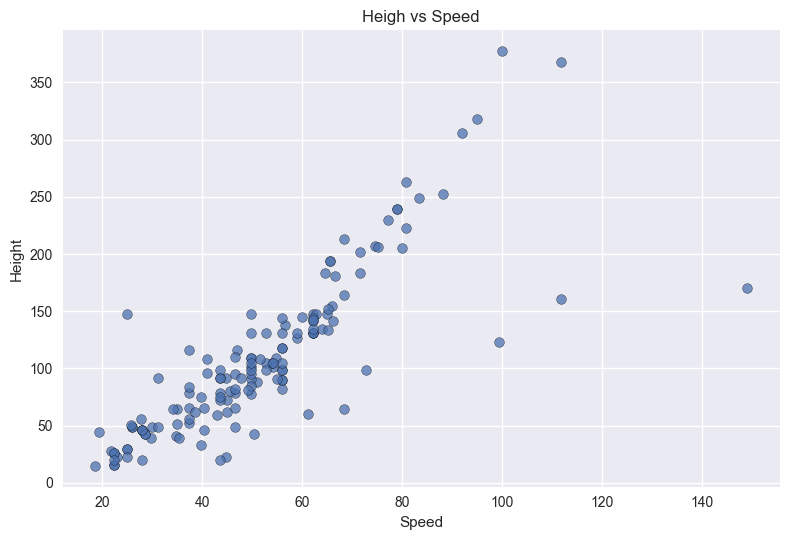

In [219]:
plt.scatter(x,y, 
            edgecolors='black', 
            alpha=0.75,      
            )


plt.title('Heigh vs Speed')
plt.xlabel('Speed')
plt.ylabel('Height')

plt.tight_layout()

plt.show()

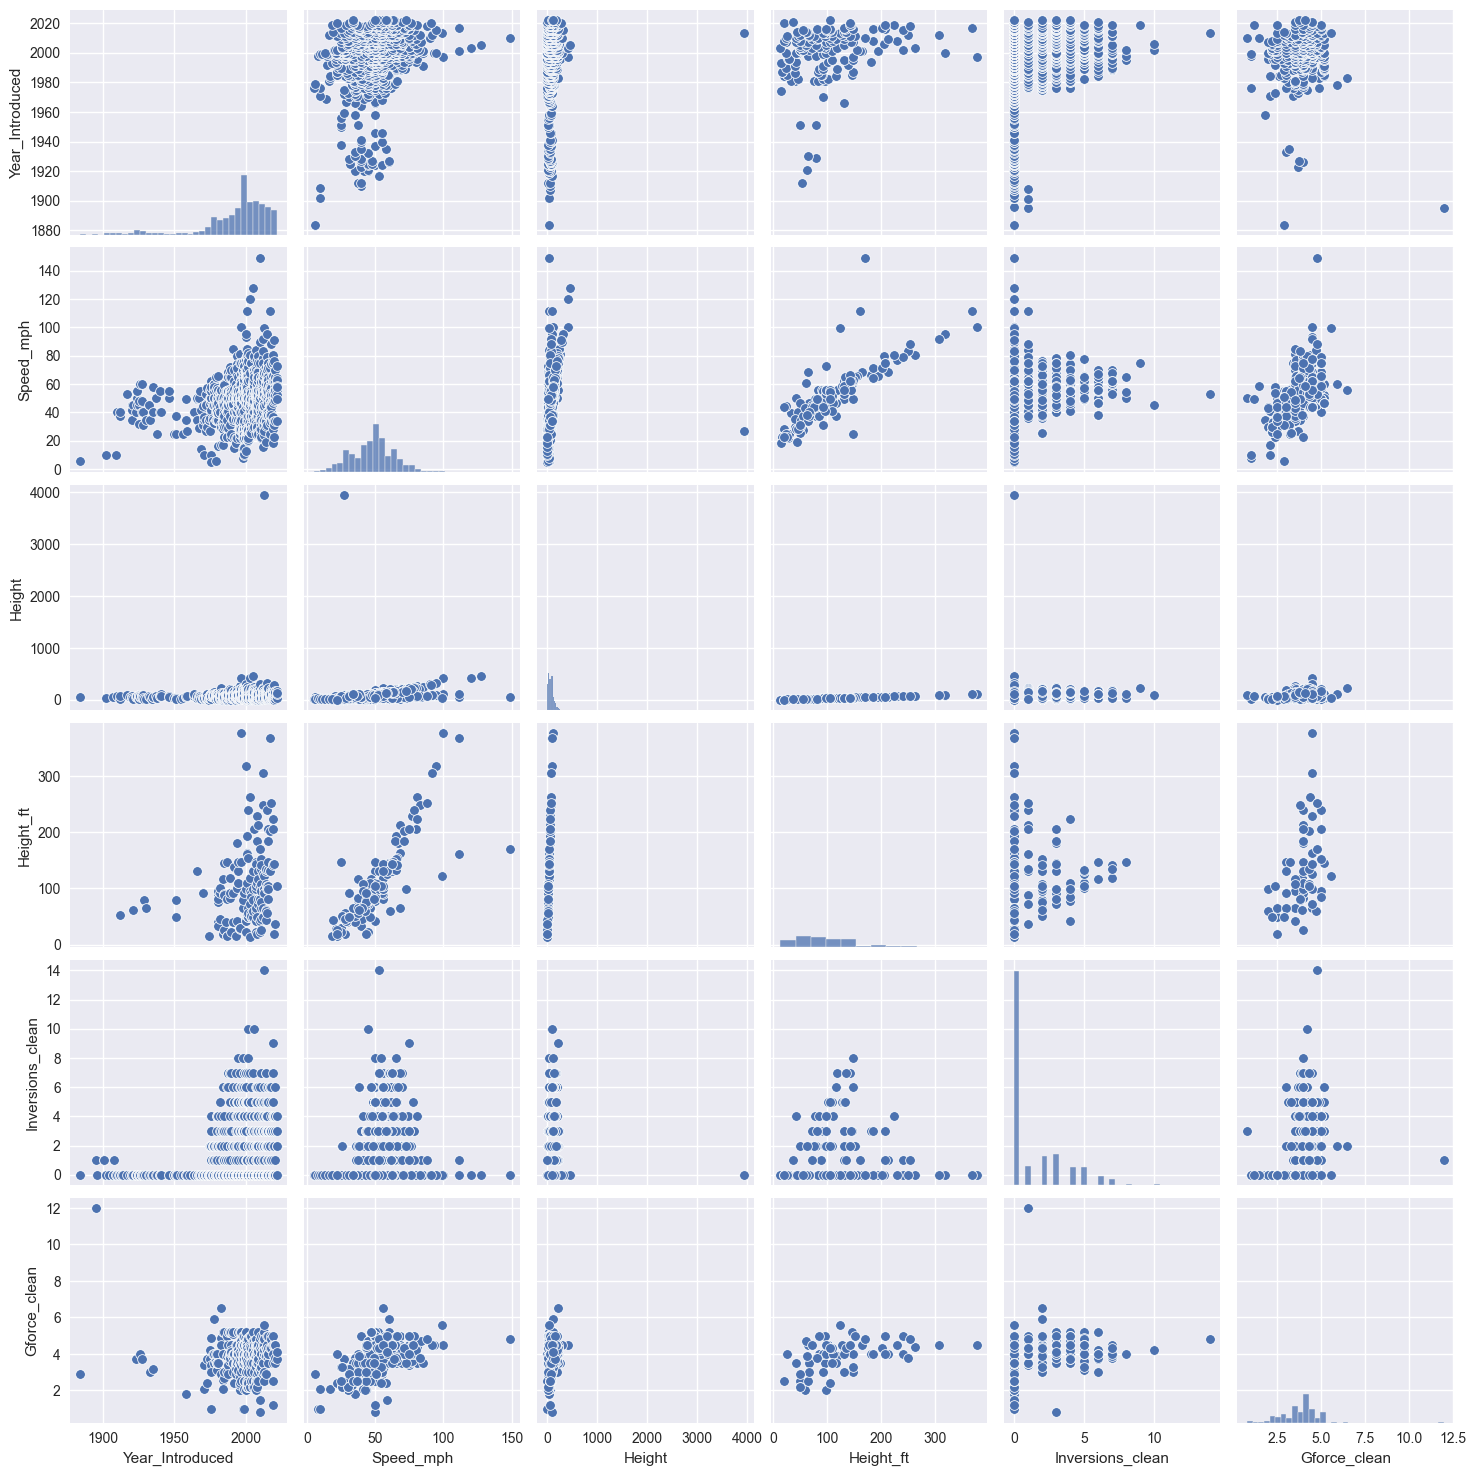

In [215]:
sns.pairplot(df)

In [216]:
df.describe()

,Year_Introduced,Speed_mph,Height,Height_ft,Inversions_clean,Gforce_clean
count,990.000000,850.000000,880.000000,159.000000,990.000000,324.000000
mean,1994.054545,49.017647,90.131114,103.994340,1.308081,3.815093
std,23.872027,16.847266,141.817601,68.293609,2.026876,1.009229
min,1884.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,1988.000000,37.300000,44.000000,52.150000,0.000000,3.375000
50%,2000.000000,50.000000,78.450000,91.900000,0.000000,4.000000
75%,2009.000000,58.000000,114.800000,133.850000,2.000000,4.500000
max,2022.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Coaster_Name        990 non-null    object        
 1   Length              867 non-null    object        
 2   Speed               850 non-null    object        
 3   Location            990 non-null    object        
 4   Manufacturer        932 non-null    object        
 5   G-force             324 non-null    object        
 6   Max vertical angle  330 non-null    object        
 7   Drop                447 non-null    object        
 8   Year_Introduced     990 non-null    int64         
 9   Opening_Date        807 non-null    datetime64[ns]
 10  Speed_mph           850 non-null    float64       
 11  Height              880 non-null    float64       
 12  height_unit         880 non-null    object        
 13  Height_ft           159 non-null    float64       

In [221]:
numeric_cols= ['Year_Introduced','Speed_mph','Height_ft', 'Inversions_clean', 'Gforce_clean']

In [224]:
df_corr = df[numeric_cols].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_clean,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

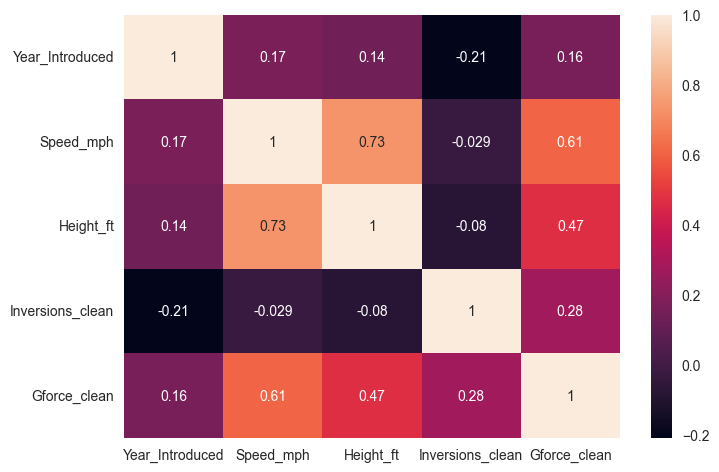

In [226]:
sns.heatmap(df_corr, annot=True)

In [227]:
df['Location'].value_counts()

Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: Location, Length: 280, dtype: int64

In [229]:
df.query('Location !=  "Other"')

,Coaster_Name,Length,Speed,Location,Manufacturer,G-force,Max vertical angle,Drop,Year_Introduced,Opening_Date,Speed_mph,Height,height_unit,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,LaMarcus Adna Thompson,2.9,30°,43 ft (13 m),1884,1884-06-16,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Lina Beecher,12,NaN,NaN,1895,1895-01-01,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",NaN,NaN,NaN,NaN,1896,NaT,NaN,NaN,NaN,NaN,0,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,George Francis Meyer,NaN,NaN,NaN,1902,1902-01-01,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Federal Construction Company,NaN,25°,9 ft (2.7 m),1902,1902-01-01,10.0,41.0,ft,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),"1,900 ft (580 m)",52 mph (84 km/h),SeaWorld Orlando,Premier Rides,NaN,100°,NaN,2022,2022-02-01,52.0,93.0,ft,NaN,0,NaN
986,Leviathan (Sea World),"1,000.0 m (3,280.8 ft)",80.0 km/h (49.7 mph),Sea World,Martin & Vleminckx,NaN,NaN,NaN,2022,2022-01-01,49.7,32.0,m,105.0,0,NaN
987,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Intamin,NaN,95°,NaN,2022,2022-01-01,73.0,178.0,ft,NaN,2,NaN
988,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,S&S – Sansei Technologies,NaN,NaN,NaN,2022,NaT,34.0,112.0,ft,NaN,0,NaN


In [238]:
df.query('Location !=  "Other"')\
.groupby('Location')['Speed_mph'] \
.agg(['mean', 'count'])\
.query('count >= 10')\
.sort_values(by='count', ascending=False)


,mean,count
Location,,
Kings Island,49.273684,19
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Carowinds,43.571429,14
Hersheypark,50.576923,13
Alton Towers,42.791667,12
Canada's Wonderland,53.533333,12
Kings Dominion,52.083333,12
Busch Gardens Williamsburg,58.318182,11


<Axes: ylabel='Location'>

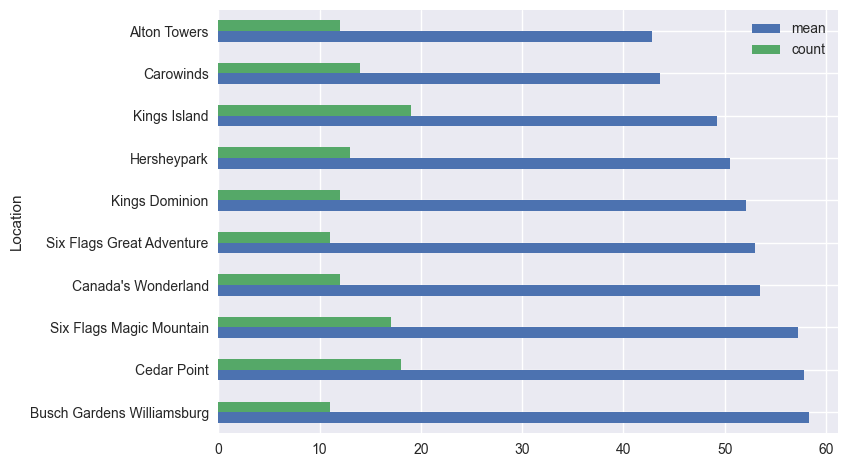

In [240]:
df.query('Location !=  "Other"')\
.groupby('Location')['Speed_mph'] \
.agg(['mean', 'count'])\
.query('count >= 10')\
.sort_values(by='mean', ascending=False)\
.plot(kind='barh')